#EDA Final Project


## Contents of the Notebook:

### Part1: Exploratory Data Analysis(EDA):
1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

### Part2: Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

### Part3: Predictive Modeling
1)Running Basic Algorithms.

2)OverSampling using Random oversampling as smote

3)Principle componet anaylyis PCA on some features.

#**Part1: Exploratory Data Analysis(EDA)**




In [ ]:
!pip install webcolors
!pip install imblearn

In [ ]:
#Data manipulation
import numpy as np
import pandas as pd

#Data visualizion
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Color to name
from webcolors import rgb_to_name
from scipy.spatial import KDTree
from webcolors import CSS3_HEX_TO_NAMES, hex_to_rgb
from imblearn.over_sampling import RandomOverSampler

plt.style.use('seaborn-v0_8-bright')


In [ ]:
df = pd.read_csv('/content/full_gen_data.csv')
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [ ]:
df.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [ ]:
#dropping duplicates
df.drop_duplicates()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0


In [ ]:
#style ,sizes ,style ,category ,productgroup ,article.1 ,retailweek ,article ,country
col_names = ['gender' ,'sizes', 'style' , 'productgroup', 'article.1' , 'retailweek', 'article', 'country','category']
for col in col_names:
  print("---->",col)
  print(df[col].value_counts())
  print('#'*50)


----> gender
women     70000
kids      10000
unisex    10000
men       10000
Name: gender, dtype: int64
##################################################
----> sizes
xxs,xs,s,m,l,xl,xxl    90000
xs,s,m,l,xl            10000
Name: sizes, dtype: int64
##################################################
----> style
regular    50000
wide       30000
slim       20000
Name: style, dtype: int64
##################################################
----> productgroup
SHOES                   60000
HARDWARE ACCESSORIES    20000
SHORTS                  10000
SWEATSHIRTS             10000
Name: productgroup, dtype: int64
##################################################
----> article.1
OC6355    10000
AP5568    10000
CB8861    10000
LI3529    10000
GG8661    10000
TX1463    10000
PC6383    10000
VT7698    10000
FG2965    10000
AC7347    10000
Name: article.1, dtype: int64
##################################################
----> retailweek
2015-11-22    1100
2016-12-25    1050
2015-09-27    1010
2016

##**After seeing the offer How many customers purchaed the the item?**

<Axes: ylabel='label'>

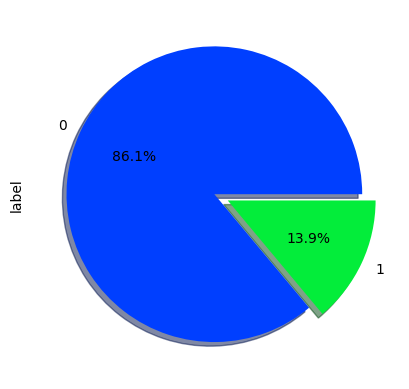

In [ ]:
#the Label columns is unblacned
df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)



Out of 10000, only around 1390 purchased i.e Only **13.9%** of the total. We need to dig down more to get better insights from the data and see which categories of the customer did purchase and who didn't.

## **Analysing The Features**

<ipython-input-422-14041c740d6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm')


<Axes: >

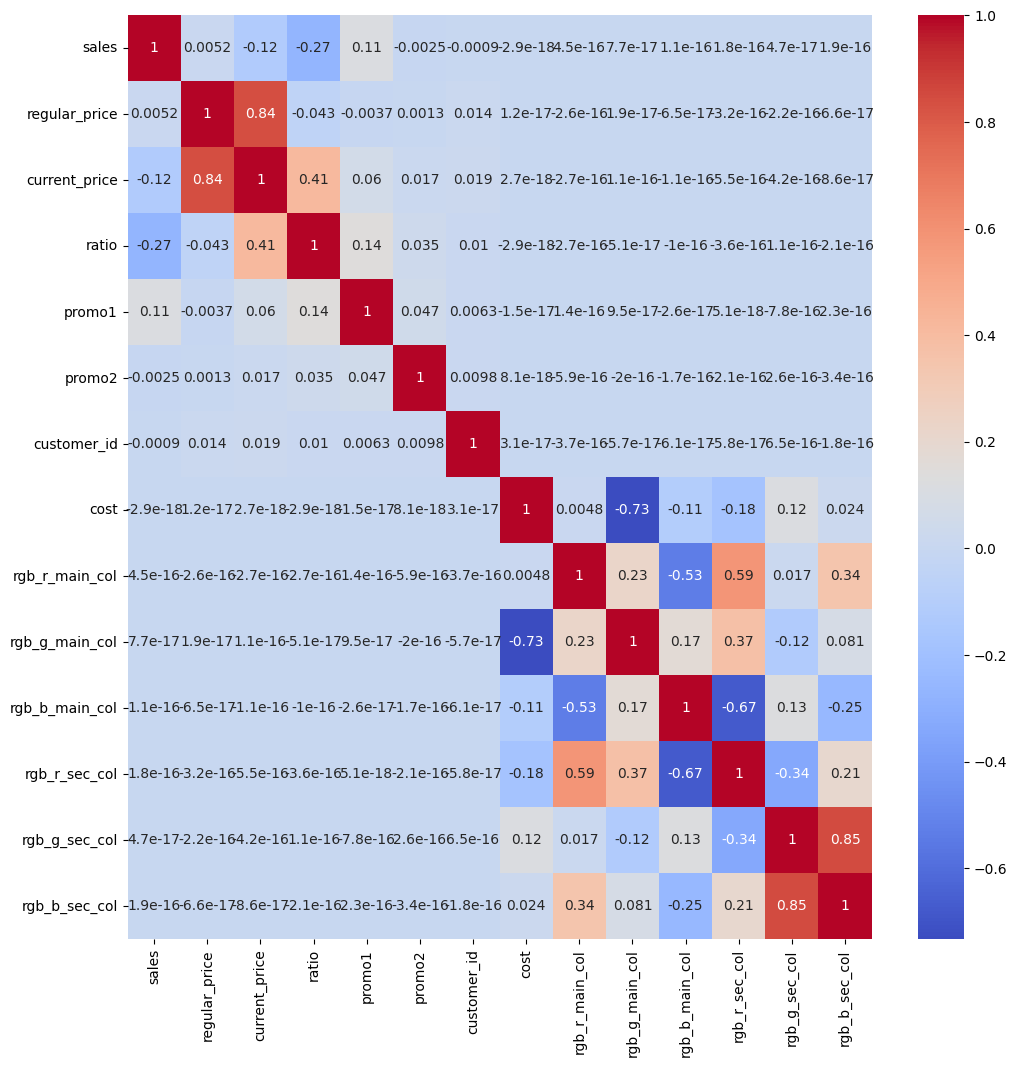

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm')

## Gender ---> Categorical Feature

In [ ]:
df.groupby(['gender','label'])['label'].count()

gender  label
kids    0         8624
        1         1376
men     0         8624
        1         1376
unisex  0         8574
        1         1426
women   0        60250
        1         9750
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='gender'>

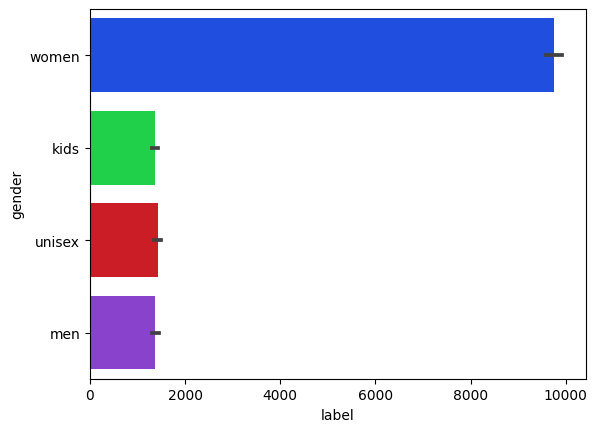

In [ ]:
sns.barplot(data = df, y= 'gender',x='label',estimator='sum')

In [ ]:
#The Ratio of people of purchased or not for each category
grouped = df.groupby(['gender', 'label']).size().unstack()
grouped['ratio'] = grouped[1] / grouped[0]
grouped['ratio']

gender
kids      0.159555
men       0.159555
unisex    0.166317
women     0.161826
Name: ratio, dtype: float64

* This looks interesting. The number of offers that targeted women is far more greater than men , unisex and kids
* the ratio of the user who purchased and who didn't purchased is almost the same  **0.16**


## Country ---> Categorical Feature

In [ ]:
df.groupby(['country','label'])['label'].count()

country  label
Austria  0        30096
         1         5044
France   0        13413
         1         2047
Germany  0        42563
         1         6837
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='country'>

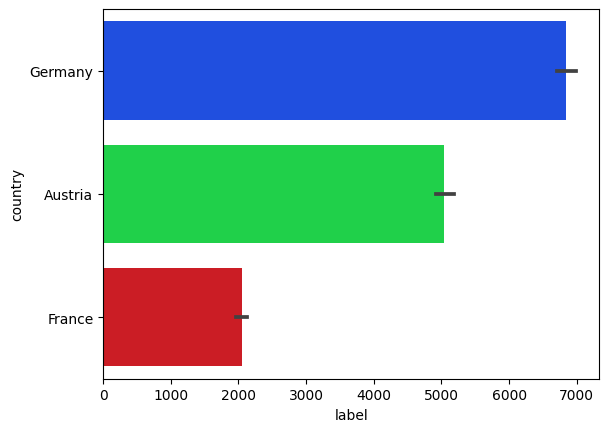

In [ ]:
sns.barplot(data = df, y= 'country',x='label',estimator='sum')

In [ ]:
#The Ratio of people of purchased or not for each category
grouped = df.groupby(['country', 'label']).size().unstack()
grouped['ratio'] = grouped[1] / grouped[0]
grouped['ratio']

country
Austria    0.167597
France     0.152613
Germany    0.160632
Name: ratio, dtype: float64

* The number of offers in both Austria and Germany is  greater than france
* the ratio of the user who purchased and who dident purchased is every conuntry is almost the same  **0.16**


## productgroup ---> Categorical Feature

In [ ]:
df.groupby(['productgroup','label'])['label'].count()

productgroup          label
HARDWARE ACCESSORIES  0        17186
                      1         2814
SHOES                 0        51626
                      1         8374
SHORTS                0         8649
                      1         1351
SWEATSHIRTS           0         8611
                      1         1389
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='productgroup'>

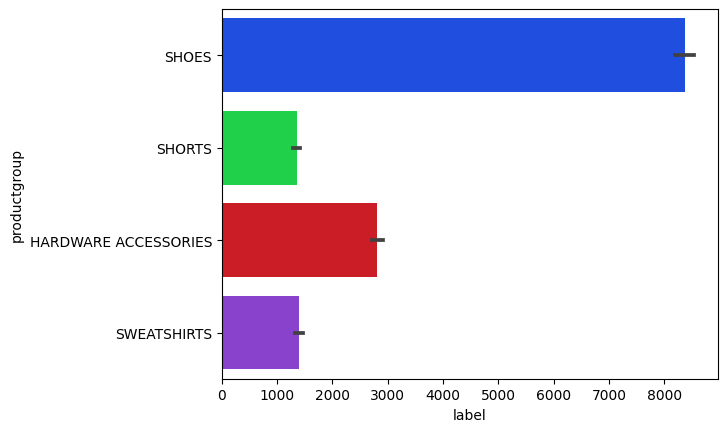

In [ ]:
sns.barplot(data = df, y= 'productgroup',x='label',estimator='sum')

In [ ]:
#The Ratio of people of purchased or not for each category
grouped = df.groupby(['productgroup', 'label']).size().unstack()
grouped['ratio'] = grouped[1] / grouped[0]
grouped['ratio']

productgroup
HARDWARE ACCESSORIES    0.163738
SHOES                   0.162205
SHORTS                  0.156203
SWEATSHIRTS             0.161305
Name: ratio, dtype: float64

* the ratio of the user who purchased and who dident purchased is every prodcut group is almost the same  **0.16**


## category ---> Categorical Feature

In [ ]:
df.groupby(['category','label'])['label'].count()

category          label
FOOTBALL GENERIC  0        17198
                  1         2802
GOLF              0         8583
                  1         1417
INDOOR            0         8652
                  1         1348
RELAX CASUAL      0         8533
                  1         1467
RUNNING           0        17227
                  1         2773
TRAINING          0        25879
                  1         4121
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='category'>

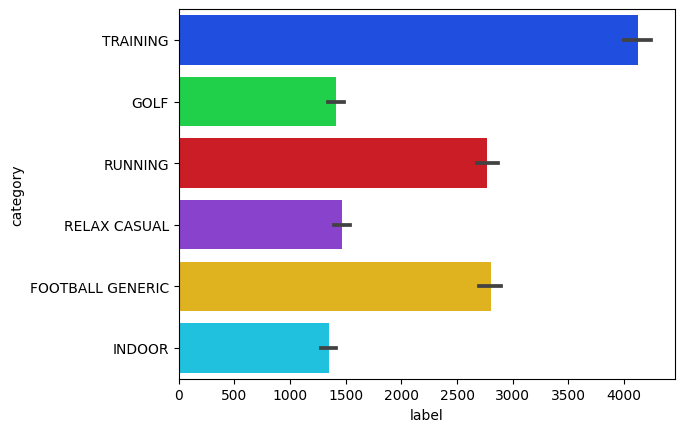

In [ ]:
sns.barplot(data = df, y= 'category',x='label',estimator='sum')

In [ ]:
grouped = df.groupby(['category', 'label']).size().unstack()

# Calculate the ratio for each country
grouped['ratio'] = grouped[1] / grouped[0]
grouped['ratio']

category
FOOTBALL GENERIC    0.162926
GOLF                0.165094
INDOOR              0.155802
RELAX CASUAL        0.171921
RUNNING             0.160968
TRAINING            0.159241
Name: ratio, dtype: float64

* the ratio of the user who purchased and who dident purchased is every category is almost the same  **0.16**


##Sizes--> Ordinal Values

In [ ]:
pd.crosstab(df.sizes,df.label,margins=True).style.background_gradient()

label,0,1,All
sizes,,,
"xs,s,m,l,xl",8574,1426,10000
"xxs,xs,s,m,l,xl,xxl",77498,12502,90000
All,86072,13928,100000


Sizes Feature has the  Ratio  at every size

## **category ---> Categorical Feature**




In [ ]:
df.groupby(['category','label'])['label'].count()

category          label
FOOTBALL GENERIC  0        17198
                  1         2802
GOLF              0         8583
                  1         1417
INDOOR            0         8652
                  1         1348
RELAX CASUAL      0         8533
                  1         1467
RUNNING           0        17227
                  1         2773
TRAINING          0        25879
                  1         4121
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='category'>

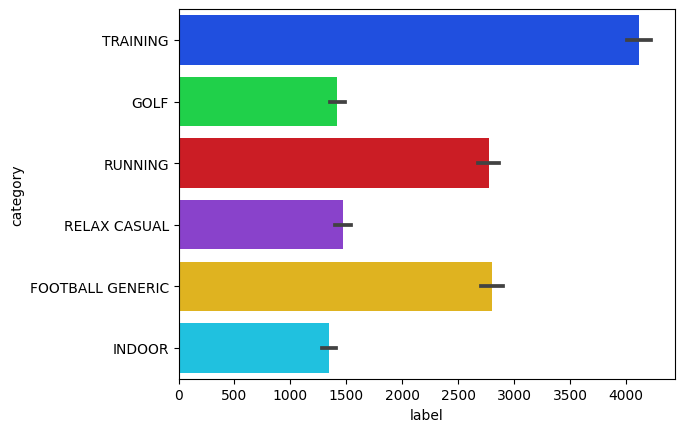

In [ ]:
sns.barplot(data = df, y= 'category',x='label',estimator='sum')

In [ ]:
grouped = df.groupby(['category', 'label']).size().unstack()

# Calculate the ratio for each country
grouped['ratio'] = grouped[1] / grouped[0]
grouped['ratio']

category
FOOTBALL GENERIC    0.162926
GOLF                0.165094
INDOOR              0.155802
RELAX CASUAL        0.171921
RUNNING             0.160968
TRAINING            0.159241
Name: ratio, dtype: float64


* The Ratio is almost the same in each category except for Relax Casual is slightly higher.
---



## **Retail of week ---> date object**




In [ ]:
df['retailweek'] = pd.to_datetime(df['retailweek'])

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Number of purchaed items')]

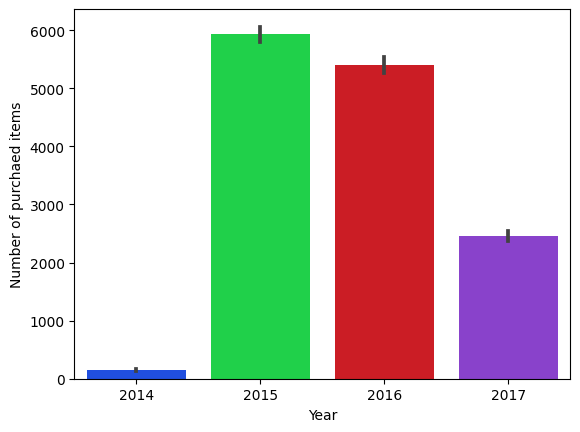

In [ ]:
# why  2014 and 2017 have the losses numbers
# we started from at the end of 2014 to the half of 2017 this is the reason why

ax = sns.barplot( x=df['retailweek'].dt.year,y=df['label'],estimator='sum')
ax.set(xlabel='Year', ylabel='Number of purchaed items')

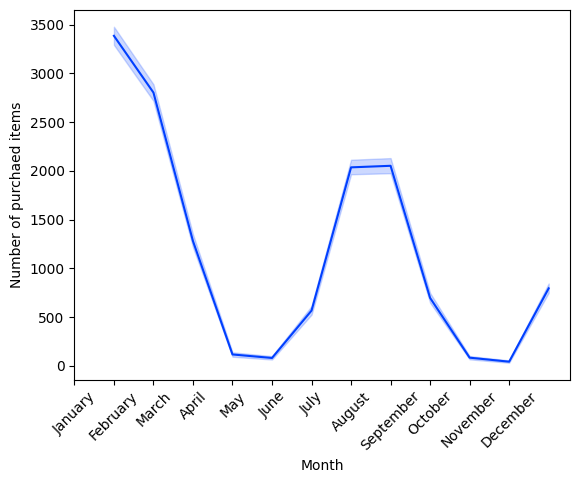

In [ ]:
#Why in 123 and 678 we have an increase in then numbers
ax = sns.lineplot( x=df['retailweek'].dt.month,y=df['label'],estimator='sum')
plt.xticks( [0,1,2,3,4,5,6,7,8,9,10,11],['January', 'February', 'March','April','May','June','July','August',
                       'September','October','November','December'], rotation=45)
ax.set(xlabel='Month', ylabel='Number of purchaed items')
plt.show()

In [ ]:
df['week_number'] = (df['retailweek'].dt.day - 1) // 7 + 1
df['week_number'].unique()

array([4, 5, 2, 3, 1])

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5')])

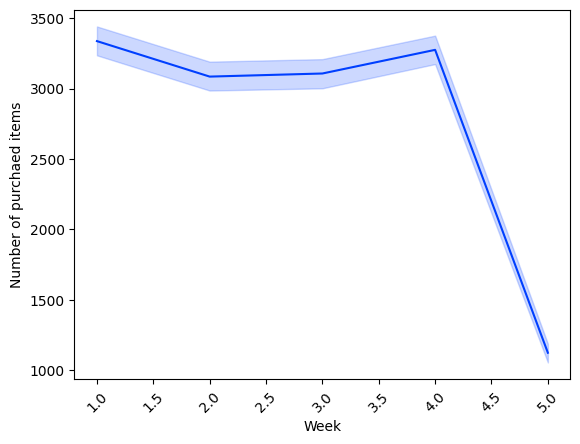

In [ ]:
ax = sns.lineplot( x=df['week_number'],y=df['label'],estimator='sum')
ax.set(xlabel='Week', ylabel='Number of purchaed items')
plt.xticks( rotation=45)


<Axes: xlabel='country', ylabel='count'>

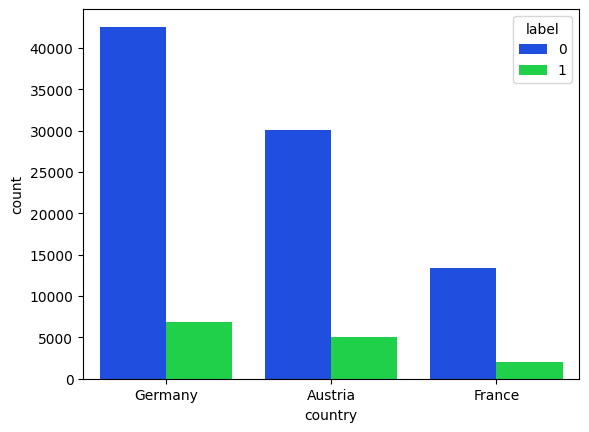

In [ ]:
sns.countplot(x=df['country'],hue=df['label'])

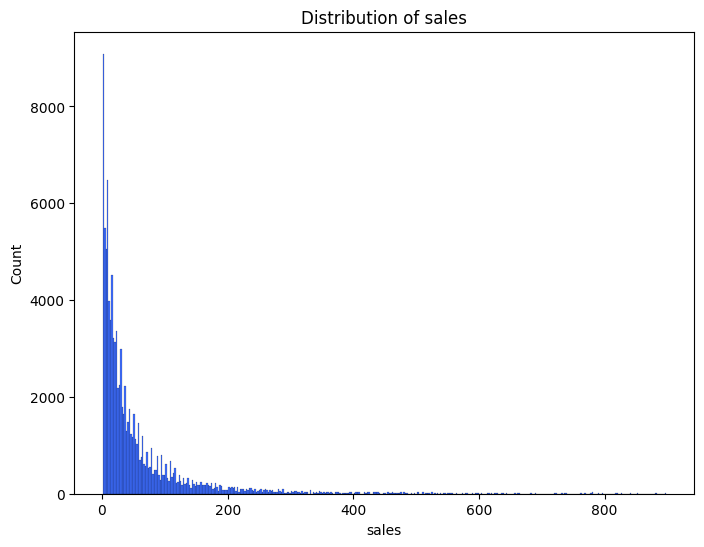

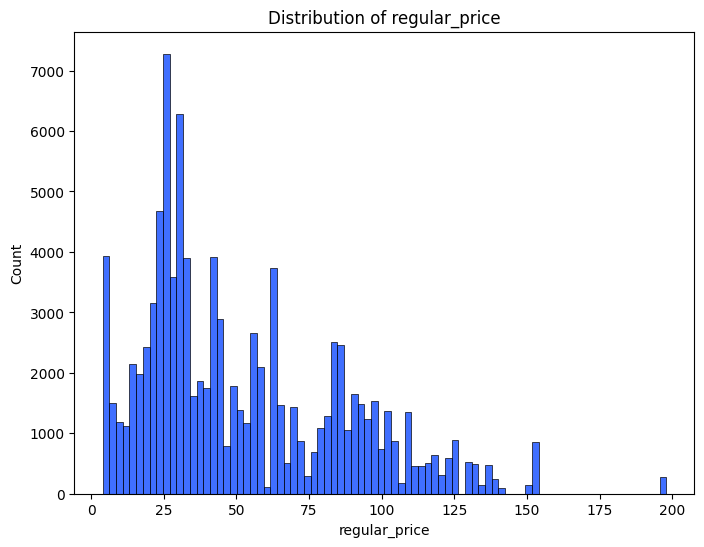

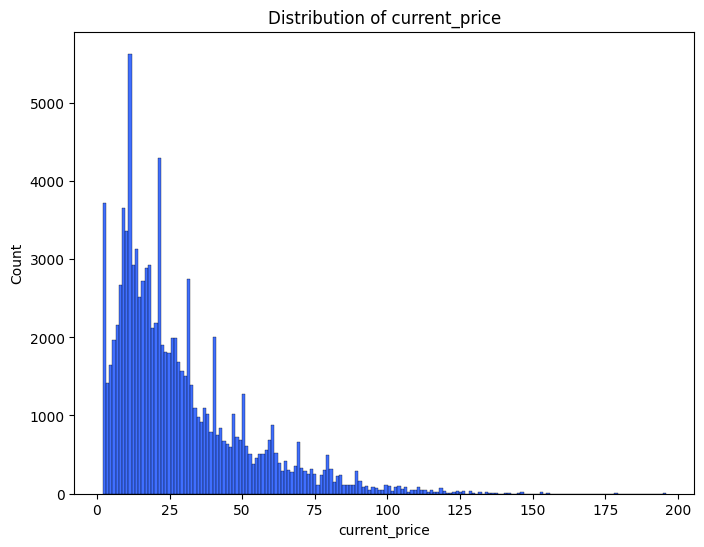

In [ ]:
# Histograms for continuous variables
continuous_vars = ['sales', 'regular_price', 'current_price']
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var)
    plt.title("Distribution of " + var)
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

In [ ]:
df['retailweek'] = pd.to_datetime(df['retailweek'])
df

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,week_number
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,4
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,4
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,4
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,4
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0,4
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0,4
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0,4
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0,4


##**Promo**

In [ ]:
promos = df.groupby(['promo1','promo2'])['label'].sum().sort_values(ascending=False)
promos = promos.reset_index()
promos = promos.iloc[1:,:]
promos

,promo1,promo2,label
1,1,0,1355
2,0,1,75
3,1,1,42


([<matplotlib.axis.XTick at 0x7aac4e096c80>,
 [Text(0, 0, 'promo1'), Text(1, 0, 'promo2'), Text(2, 0, 'promo 1 and 2')])

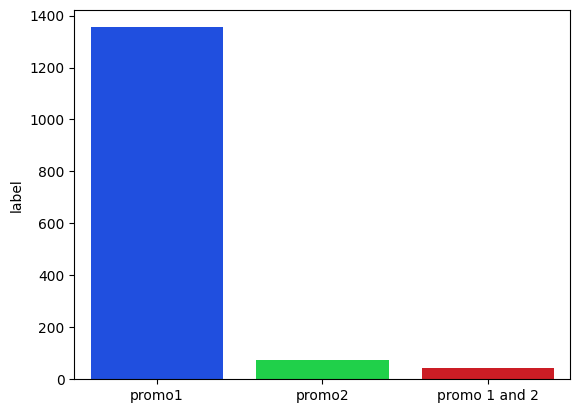

In [ ]:
sns.barplot(data=promos, x=promos.index, y=promos['label'])
plt.xticks( [0,1,2],["promo1",'promo2',"promo 1 and 2"])

In [ ]:
df.groupby(['promo1','promo2','label'])['label'].count()

promo1  promo2  label
0       0       0        80974
                1        12456
        1       0          305
                1           75
1       0       0         4725
                1         1355
        1       0           68
                1           42
Name: label, dtype: int64

In [ ]:

grouped = df.groupby(['promo1','promo2', 'label']).size().unstack()
grouped['promo1'] = grouped[1] / grouped[0]
grouped['promo1']

promo1  promo2
0       0         0.153827
        1         0.245902
1       0         0.286772
        1         0.617647
Name: promo1, dtype: float64

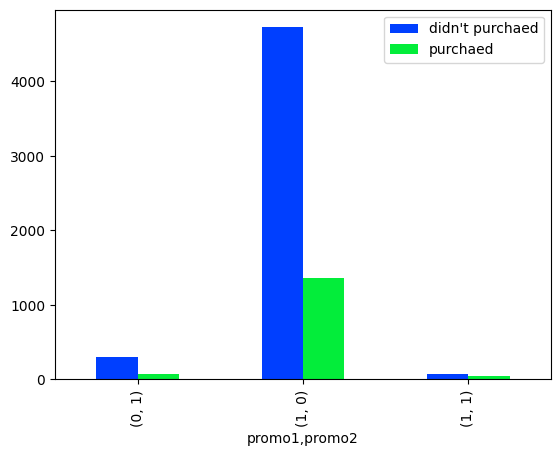

In [ ]:
grouped = df.groupby(['promo1','promo2', 'label']).size().unstack().iloc[1:,:].plot(kind='bar')
plt.legend(["didn't purchaed", "purchaed"])


If no **promos** was active the ratio of user who will buy to who won't buy is **0.15**

but if **promo1** was applied the ratio will be up to **0.28** and if **promo2** was applied the ratio goes up to **0.617**

#**Part2: Feature Engineering and Data Cleaning**






## RGB values

#### Problem With RGB columns:

RGB Values are seprated in 3 diffrent columns each one represent a channel R,G,B.

We need to convert these **3 columns into one column** and from 3 discrete values to one catagorical value.

We can acheive this by using webcolors libarry to map the rgb value to its nearest color


In [ ]:
# Using webcolors libarry to change the
def convert_rgb_to_names(row, R, G, B):
    # A dictionary of all the hex and their respective names in CSS3
    css3_db = CSS3_HEX_TO_NAMES

    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))

    kdt_db = KDTree(rgb_values)
    rgb_tuple = (row[R], row[G], row[B])
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

In [ ]:
# Changing the main_color from RGB to name
df['main_color'] = df.apply(convert_rgb_to_names, args=('rgb_r_main_col','rgb_g_main_col','rgb_b_main_col'), axis=1)
df['main_color'].value_counts()


chocolate       10000
darkkhaki       10000
goldenrod       10000
rosybrown       10000
blueviolet      10000
steelblue       10000
brown           10000
lightskyblue    10000
silver          10000
gray            10000
Name: main_color, dtype: int64

In [ ]:
# Changing the sec_color from RGB to name
df['secondary_color'] = df.apply(convert_rgb_to_names, args=('rgb_r_sec_col','rgb_g_sec_col','rgb_b_sec_col'), axis=1)
df['secondary_color'].value_counts()

rosybrown    40000
lavender     30000
lightblue    30000
Name: secondary_color, dtype: int64

###**Primary Colors**

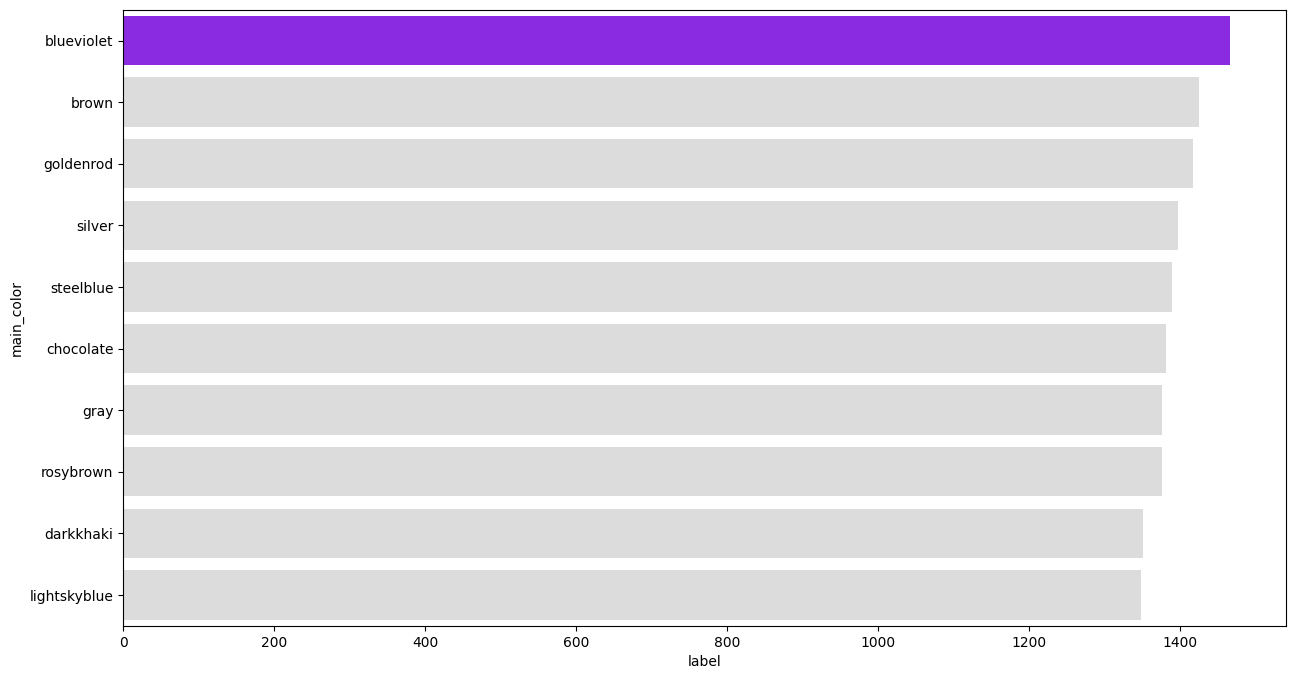

In [ ]:
plt.figure(figsize=(15, 8))

sorted_colors = df.groupby(df['main_color'])['label'].sum()

sorted_colors =sorted_colors.reset_index().sort_values(by='label', ascending=False)
bars = sns.barplot(sorted_colors, y='main_color',x='label',estimator='sum')

# Making only the highest color visible
bars.patches[0].set_facecolor('#8a2be2')
for i in bars.patches[1:]:
  i.set_facecolor('#DCDCDC')

In [ ]:
# The to colors for women

df.groupby(['gender','main_color'])['label'].aggregate('sum')

gender  main_color  
kids    rosybrown       1376
men     gray            1376
unisex  brown           1426
women   blueviolet      1467
        chocolate       1381
        darkkhaki       1351
        goldenrod       1417
        lightskyblue    1348
        silver          1397
        steelblue       1389
Name: label, dtype: int64

- females have 7 colors
- kids , men and unisex  have only one color

###**Secondary Colors**

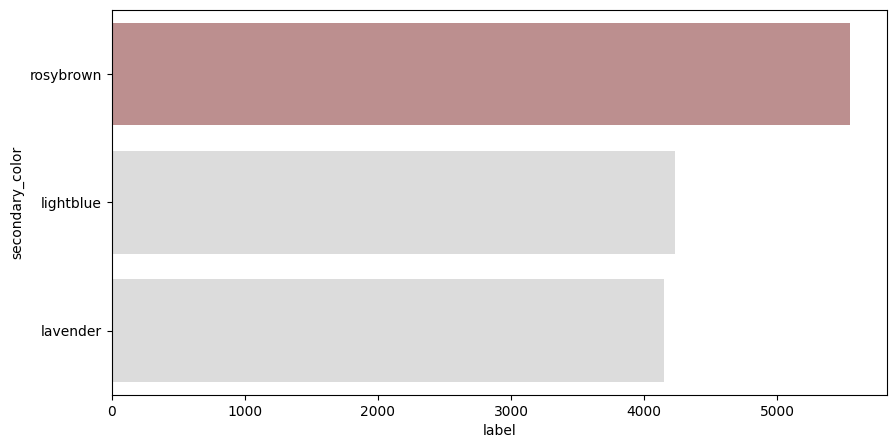

In [ ]:
plt.figure(figsize=(10, 5))

sorted_colors = df['label'].groupby(df['secondary_color']).sum()

sorted_colors =sorted_colors.reset_index().sort_values(by='label', ascending=False)
bars = sns.barplot(sorted_colors, y='secondary_color',x='label',estimator='sum')

# Making only the highest color visible
bars.patches[0].set_facecolor('#bc8f8f')
for i in bars.patches[1:]:
  i.set_facecolor('#DCDCDC')

In [ ]:
df.sort_values(by='retailweek' , inplace=True)
df = df.reset_index(drop=True)

<Axes: xlabel='secondary_color', ylabel='label'>

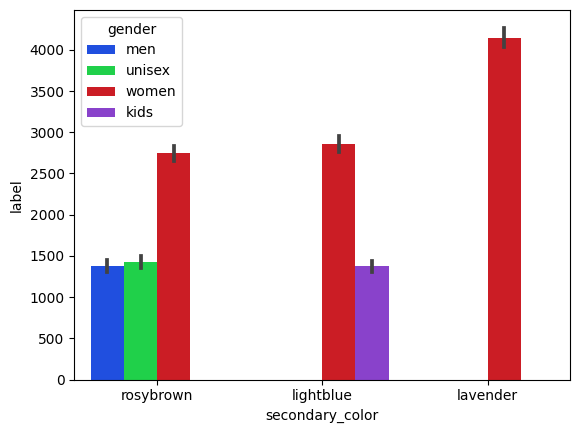

In [ ]:
sns.barplot(data = df, x= 'secondary_color',y='label', hue='gender',estimator='sum')


- The most dominent secondry color for female product is lavender
- unisex and men products has the same color (rosyBrown)
- kids has only one color which is lightblue

(array([0, 1, 2, 3]),
 [Text(0, 0, 'SHOES'),
  Text(1, 0, 'SWEATSHIRTS'),
  Text(2, 0, 'HARDWARE ACCESSORIES'),
  Text(3, 0, 'SHORTS')])

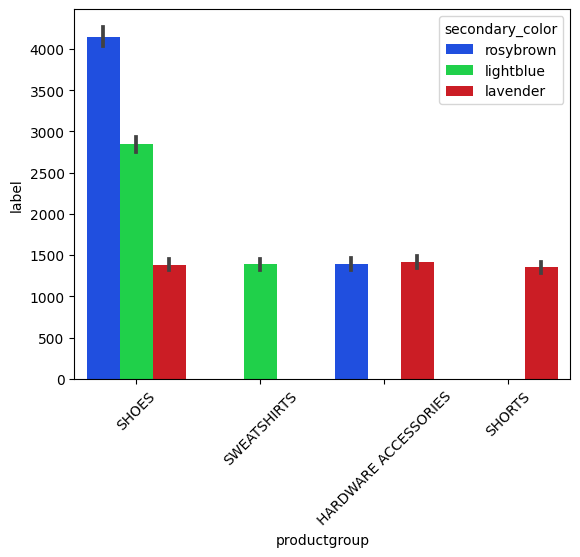

In [ ]:
sns.barplot(data = df, x= 'productgroup',y='label', hue='secondary_color',estimator='sum')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'SHOES'),
  Text(1, 0, 'SWEATSHIRTS'),
  Text(2, 0, 'HARDWARE ACCESSORIES'),
  Text(3, 0, 'SHORTS')])

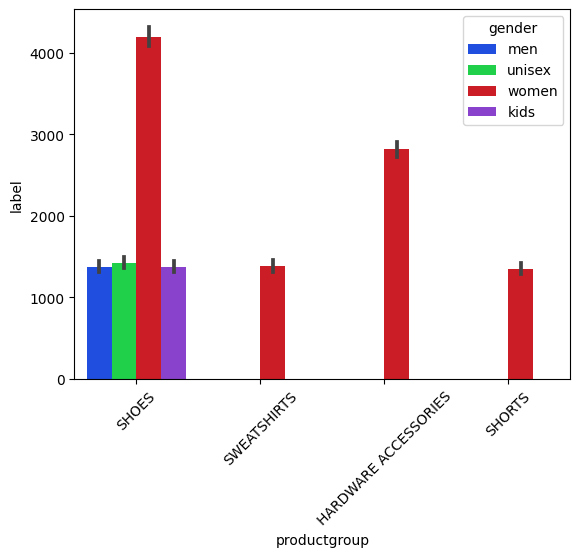

In [ ]:
sns.barplot(data = df, x= 'productgroup',y='label', hue='gender',estimator='sum')
plt.xticks(rotation = 45)


##**Price Diffrence Column**

*  current_price and regular_price have a very high correlation


*  a great idea would be to only use their diffrence in one column

In [ ]:
df['prices_diff']=df['regular_price']-df['current_price']

##**Encoding the style column**
* as it a Ordianl values we will replace
slim --->1
regular--->2
wide --->3

In [ ]:
mapper = {'slim': 1 , 'regular':2, 'wide':3}
df['style'] = df['style'].map(mapper)

##**Encoding the sizes column**

* xxs,xs,s,m,l,xl,xxl ---> 1
* xs,s,m,l,xl    ----> 0



In [ ]:
mapper = {'xxs,xs,s,m,l,xl,xxl': 0 , 'xs,s,m,l,xl':1}
df['sizes'] = df['sizes'].map(mapper)

Promo 1 is the most used


## Extracting  month number and dayoftheweek

month number is a very important feature to have in our model as it have a high correlation with the label feature


In [ ]:
df['month_num'] = df['retailweek'].dt.month

### Dropping UnNeeded Features

**Artical**--> We don't need name feature as it cannot be converted into any categorical value.

**RGB columns**--> we convertated it already to catagorical values

**CustomerID**--> cannot be categorised.

**regular_price and current_price**--> We derived a new feature that represent them both

**retail_weak**-->we extracted the month and the day of the week in a new columns


In [ ]:
df.drop(['retailweek','article','article.1','customer_id', 'rgb_r_sec_col','rgb_g_sec_col','rgb_b_sec_col','rgb_r_main_col','rgb_g_main_col','rgb_b_main_col','regular_price','current_price'], axis=1, inplace=True)

### **OneHotEncoding the catagorical columns**

In [ ]:
# will use it later in pca
df_without_encoding = df

categorical_columns = ['country','gender', 'style','category','productgroup','secondary_color','main_color','month_num','week_number']
df = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
df

,sales,ratio,promo1,promo2,cost,sizes,label,prices_diff,country_Austria,country_France,...,month_num_8,month_num_9,month_num_10,month_num_11,month_num_12,week_number_1,week_number_2,week_number_3,week_number_4,week_number_5
0,47,0.534884,1,0,8.70,0,0,33.0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,67,0.547658,1,0,9.90,1,1,14.0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,67,0.547658,1,0,4.20,0,0,14.0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,67,0.547658,1,0,9.60,0,1,14.0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,67,0.547658,1,0,9.00,0,0,14.0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,42,0.309948,0,0,5.20,0,0,60.0,1,0,...,0,0,0,0,0,0,0,0,0,1
99996,42,0.309948,0,0,9.90,1,0,60.0,1,0,...,0,0,0,0,0,0,0,0,0,1
99997,42,0.309948,0,0,4.20,0,0,60.0,1,0,...,0,0,0,0,0,0,0,0,0,1
99998,42,0.309948,0,0,9.00,0,0,60.0,1,0,...,0,0,0,0,0,0,0,0,0,1


#**Part3: Predictive Modeling**






## **Models with no enhancements**

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report


In [ ]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### LogisticRegression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('#'*20)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

####################
The accuracy of the Logistic Regression is 0.858
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     17238
           1       0.45      0.13      0.20      2762

    accuracy                           0.86     20000
   macro avg       0.66      0.55      0.56     20000
weighted avg       0.82      0.86      0.82     20000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNeighborsClassifier Model

In [ ]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('#'*50)
print('The accuracy of the KNeighborsClassifier Regression is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

##################################################
The accuracy of the KNeighborsClassifier Regression is 0.8444
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     17238
           1       0.34      0.13      0.19      2762

    accuracy                           0.84     20000
   macro avg       0.61      0.55      0.55     20000
weighted avg       0.80      0.84      0.81     20000



### RandomForestClassifier Model

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('#'*50)
print('The accuracy of the RandomForestClassifier Regression is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

##################################################
The accuracy of the RandomForestClassifier Regression is 0.8501
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     17238
           1       0.39      0.16      0.23      2762

    accuracy                           0.85     20000
   macro avg       0.64      0.56      0.57     20000
weighted avg       0.81      0.85      0.82     20000



## **Using Random Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1, random_state=42)



### LogisticRegression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('#'*20)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

####################
The accuracy of the Logistic Regression is 0.7843740923613128
              precision    recall  f1-score   support

           0       0.85      0.70      0.76      8611
           1       0.74      0.87      0.80      8604

    accuracy                           0.78     17215
   macro avg       0.79      0.78      0.78     17215
weighted avg       0.79      0.78      0.78     17215



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNeighborsClassifier Model

In [ ]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('#'*50)
print('The accuracy of the KNeighborsClassifier Regression is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

##################################################
The accuracy of the KNeighborsClassifier Regression is 0.8383967470229451
              precision    recall  f1-score   support

           0       0.96      0.71      0.81      8611
           1       0.77      0.97      0.86      8604

    accuracy                           0.84     17215
   macro avg       0.86      0.84      0.84     17215
weighted avg       0.86      0.84      0.84     17215



### RandomForestClassifier Model

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('#'*50)
print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

##################################################
The accuracy of the RandomForestClassifier is 0.952076677316294
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      8611
           1       0.91      1.00      0.95      8604

    accuracy                           0.95     17215
   macro avg       0.96      0.95      0.95     17215
weighted avg       0.96      0.95      0.95     17215



## **Using Somte Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1, random_state=42)



### LogisticRegression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('#'*20)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

####################
The accuracy of the Logistic Regression is 0.8944525123438861
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      8611
           1       0.91      0.87      0.89      8604

    accuracy                           0.89     17215
   macro avg       0.90      0.89      0.89     17215
weighted avg       0.90      0.89      0.89     17215



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNeighborsClassifier Model

In [ ]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('#'*50)
print('The accuracy of the KNeighborsClassifier is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

##################################################
The accuracy of the KNeighborsClassifier is 0.8102817310485042
              precision    recall  f1-score   support

           0       0.97      0.64      0.77      8611
           1       0.73      0.98      0.84      8604

    accuracy                           0.81     17215
   macro avg       0.85      0.81      0.80     17215
weighted avg       0.85      0.81      0.80     17215



### RandomForestClassifier Model

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('#'*50)
print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

##################################################
The accuracy of the RandomForestClassifier is 0.9124600638977636
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      8611
           1       0.93      0.90      0.91      8604

    accuracy                           0.91     17215
   macro avg       0.91      0.91      0.91     17215
weighted avg       0.91      0.91      0.91     17215



## **Applying PCA + Random Over Sampling**

In [ ]:
df

,sales,ratio,promo1,promo2,cost,sizes,label,prices_diff,country_Austria,country_France,...,month_num_8,month_num_9,month_num_10,month_num_11,month_num_12,week_number_1,week_number_2,week_number_3,week_number_4,week_number_5
0,47,0.534884,1,0,8.70,0,0,33.0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,67,0.547658,1,0,9.90,1,1,14.0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,67,0.547658,1,0,4.20,0,0,14.0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,67,0.547658,1,0,9.60,0,1,14.0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,67,0.547658,1,0,9.00,0,0,14.0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,42,0.309948,0,0,5.20,0,0,60.0,1,0,...,0,0,0,0,0,0,0,0,0,1
99996,42,0.309948,0,0,9.90,1,0,60.0,1,0,...,0,0,0,0,0,0,0,0,0,1
99997,42,0.309948,0,0,4.20,0,0,60.0,1,0,...,0,0,0,0,0,0,0,0,0,1
99998,42,0.309948,0,0,9.00,0,0,60.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.decomposition import PCA


df_encoded = pd.get_dummies(df_subset, columns=['gender', 'country', 'category','productgroup','style','sizes'], drop_first=True)

pca = PCA(n_components=3)

pca_data = pca.fit_transform(df_encoded)
df_transformed = pd.DataFrame(pca_data, columns=['PC1', 'PC2','PC3'])
df_concatenated = pd.concat([df_without_encoding, df_transformed[['PC1', 'PC2','PC3']]], axis=1)
df_concatenated.drop(['gender', 'country', 'category', 'productgroup','style','sizes'], axis=1, inplace=True)


In [ ]:
categorical_columns = ['secondary_color','main_color','month_num','week_number']
df_concatenated = pd.get_dummies(df_concatenated, columns=categorical_columns)

In [ ]:
df_concatenated

,sales,ratio,promo1,promo2,cost,label,prices_diff,PC1,PC2,PC3,...,month_num_8,month_num_9,month_num_10,month_num_11,month_num_12,week_number_1,week_number_2,week_number_3,week_number_4,week_number_5
0,47,0.534884,1,0,8.70,0,33.0,-0.984529,-0.471792,0.37618,...,0,0,0,0,1,0,0,0,1,0
1,67,0.547658,1,0,9.90,1,14.0,-0.876246,1.317182,-0.52255,...,0,0,0,0,1,0,0,0,1,0
2,67,0.547658,1,0,4.20,0,14.0,1.201068,0.753319,-0.52255,...,0,0,0,0,1,0,0,0,1,0
3,67,0.547658,1,0,9.60,1,14.0,-0.335472,-0.553673,-0.52255,...,0,0,0,0,1,0,0,0,1,0
4,67,0.547658,1,0,9.00,0,14.0,-0.906094,-0.510284,-0.52255,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,42,0.309948,0,0,5.20,0,60.0,-0.021638,0.913457,0.37618,...,0,0,0,0,0,0,0,0,0,1
99996,42,0.309948,0,0,9.90,0,60.0,-0.876246,1.317182,0.37618,...,0,0,0,0,0,0,0,0,0,1
99997,42,0.309948,0,0,4.20,0,60.0,1.201068,0.753319,0.37618,...,0,0,0,0,0,0,0,0,0,1
99998,42,0.309948,0,0,9.00,0,60.0,-0.906094,-0.510284,0.37618,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df_concatenated.drop('label', axis=1)
y = df_concatenated['label']

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1, random_state=42)


### LogisticRegression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('#'*20)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

####################
The accuracy of the Logistic Regression is 0.7886726691838513
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      8611
           1       0.74      0.88      0.81      8604

    accuracy                           0.79     17215
   macro avg       0.80      0.79      0.79     17215
weighted avg       0.80      0.79      0.79     17215



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNeighborsClassifier Model

In [ ]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('#'*50)
print('The accuracy of the KNeighborsClassifier is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

##################################################
The accuracy of the KNeighborsClassifier is 0.8406041243101946
              precision    recall  f1-score   support

           0       0.96      0.71      0.82      8611
           1       0.77      0.97      0.86      8604

    accuracy                           0.84     17215
   macro avg       0.86      0.84      0.84     17215
weighted avg       0.86      0.84      0.84     17215



### RandomForestClassifier Model

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('#'*50)
print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(y_pred,y_test))

print(classification_report(y_test, y_pred))

##################################################
The accuracy of the RandomForestClassifier is 0.95347081033982
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      8611
           1       0.92      1.00      0.96      8604

    accuracy                           0.95     17215
   macro avg       0.96      0.95      0.95     17215
weighted avg       0.96      0.95      0.95     17215

